In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kidney_disease.csv to kidney_disease.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_csv('kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
df.drop(['id'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
categorical_features

['rbc',
 'pc',
 'pcc',
 'ba',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [ ]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
numerical_features

['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

In [ ]:
for  col in categorical_features:
  print(col)
  print(df[col].unique())


rbc
[nan 'normal' 'abnormal']
pc
['normal' 'abnormal' nan]
pcc
['notpresent' 'present' nan]
ba
['notpresent' 'present' nan]
pcv
['44' '38' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '18' '42' '17' '46' '23'
 '19' '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53'
 '51' '54']
wc
['7800' '6000' '7500' '6700' '7300' nan '6900' '9600' '12100' '4500'
 '12200' '11000' '3800' '11400' '5300' '9200' '6200' '8300' '8400' '10300'
 '9800' '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300'
 '7200' '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10400' '10700' '12700' '6800'
 '6500' '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300'
 '12400' '\t8400' '10500' '4200' '4700' '10900' '8100' '9500' '2200'
 '12800' '11200' '19100' '\t?' '12300' '16700' '2600' '26400' '8800'
 '7400' '4900' '8000' '12000' '15700' '4100' '5700' '11500' '5400' '

In [ ]:
# in unique value we saw so many data entry error like dm['yes' 'no' ' yes' '\tno' '\tyes' nan] and classification ['ckd' 'ckd\t' 'notckd']

df['dm'].replace(to_replace={' yes':'yes','\tyes':'yes','\tno':'no'},inplace=True)
df['cad'].replace(to_replace={' yes':'yes','\tno':'no'},inplace=True)
df['appet'].replace(to_replace={' good':'good'},inplace=True)
df['classification'].replace(to_replace={'ckd\t':'ckd'},inplace=True)


In [ ]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

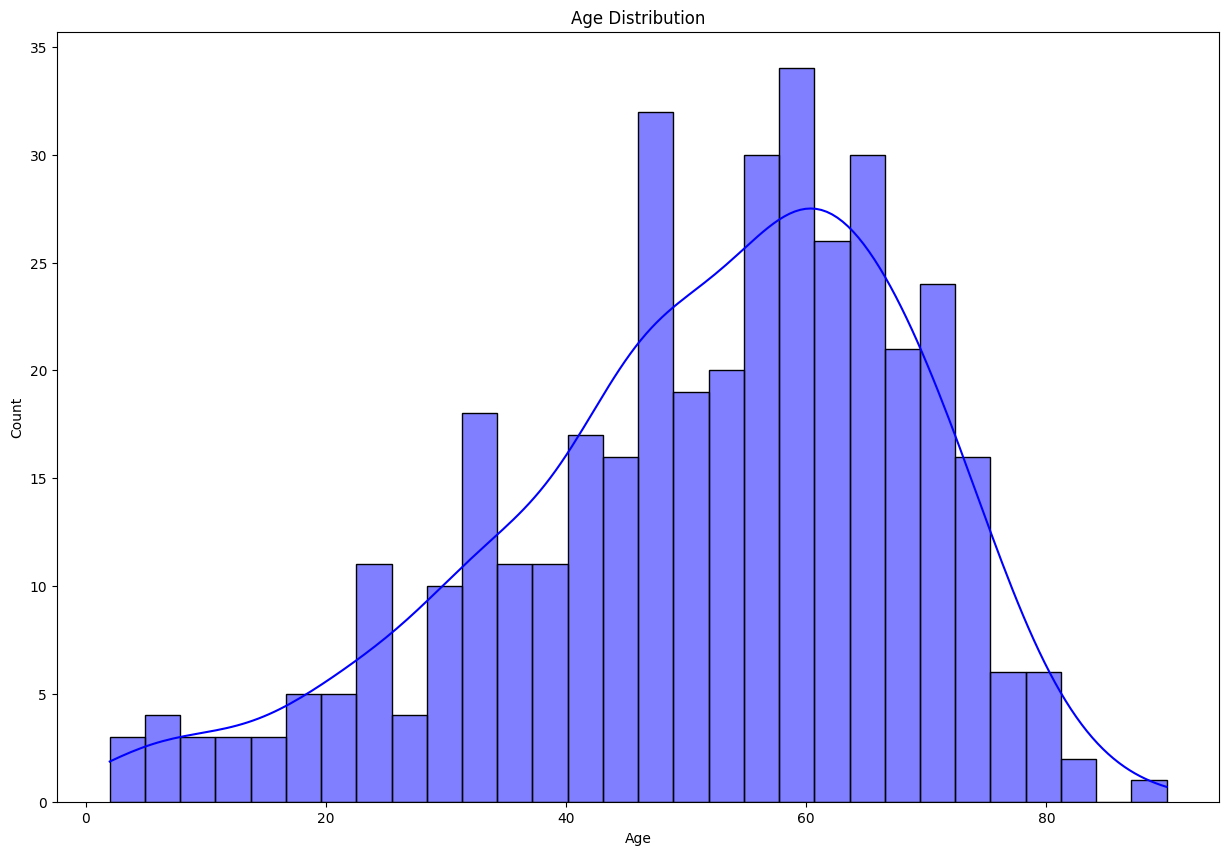

In [ ]:
plt.figure(figsize=(15,10))
sns.histplot(df['age'].dropna(),kde=True,bins=30,color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
#insight from this graph 55 to 60 age having more likely having kidney disease

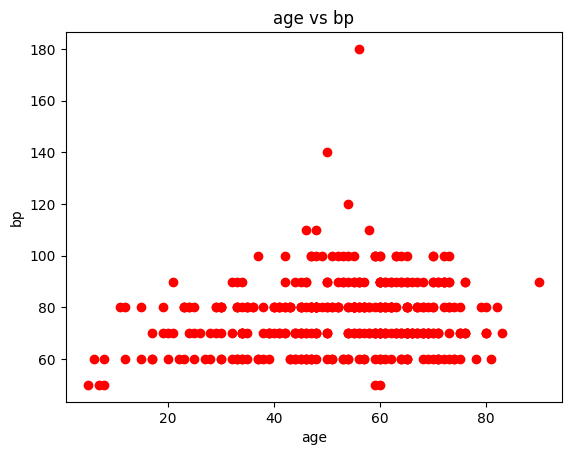

In [ ]:
plt.scatter(df['age'],df['bp'],color='red')
plt.title('age vs bp')
plt.xlabel('age')
plt.ylabel('bp')
plt.show()


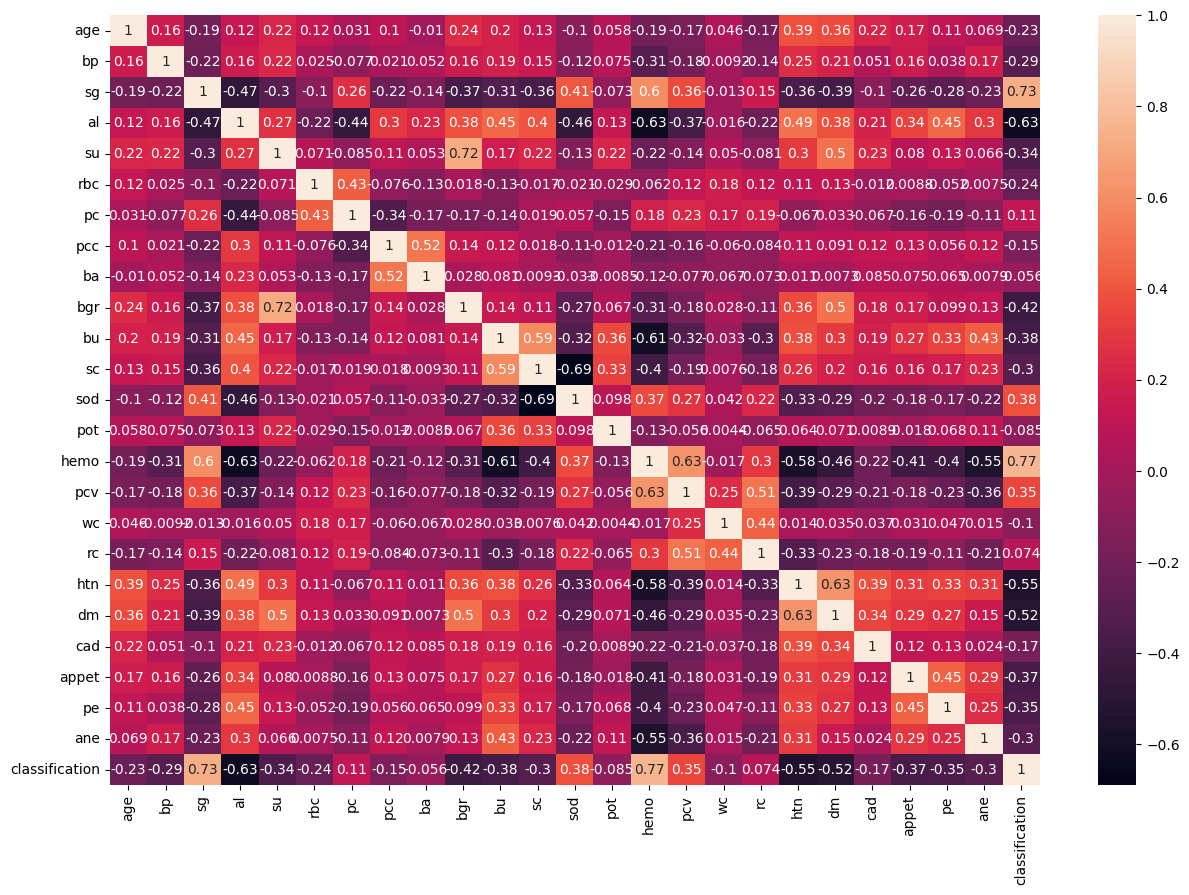

In [ ]:
corr= df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)
plt.show()

In [ ]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [ ]:
df.isnull().sum()

age                9
bp                12
sg                47
al                46
su                49
rbc                0
pc                 0
pcc                0
ba                 0
bgr               44
bu                19
sc                17
sod               87
pot               88
hemo              52
pcv                0
wc                 0
rc                 0
htn                0
dm                 0
cad                0
appet              0
pe                 0
ane                0
classification     0
dtype: int64

In [ ]:
df['sod'].fillna(df['sod'].mean(),inplace=True)
df['pot'].fillna(df['pot'].mean(),inplace=True)
df['hemo'].fillna(df['hemo'].mean(),inplace=True)
df['rc'].fillna(df['rc'].mean(),inplace=True)
df['pcv'].fillna(df['pcv'].mean(),inplace=True)
df['wc'].fillna(df['wc'].mean(),inplace=True)
df['sg'].fillna(df['sg'].mean(),inplace=True)
df['al'].fillna(df['al'].mean(),inplace=True)
df['bgr'].fillna(df['bgr'].mean(),inplace=True)
df['bu'].fillna(df['bu'].mean(),inplace=True)
df['sc'].fillna(df['sc'].mean(),inplace=True)
df['rbc'].fillna(df['rbc'].mode()[0],inplace=True)
df['pc'].fillna(df['pc'].mode()[0],inplace=True)
df['pcc'].fillna(df['pcc'].mode()[0],inplace=True)
df['ba'].fillna(df['ba'].mode()[0],inplace=True)
df['htn'].fillna(df['htn'].mode()[0],inplace=True)
df['appet'].fillna(df['appet'].mode()[0],inplace=True)
df['ane'].fillna(df['ane'].mode()[0],inplace=True)
df['classification'].fillna(df['classification'].mode()[0],inplace=True)
df['su'].fillna(df['su'].mode()[0],inplace=True)
df['age'].fillna(df['age'].mode()[0],inplace=True)
df['bp'].fillna(df['bp'].mode()[0],inplace=True)
df.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

<Axes: ylabel='classification'>

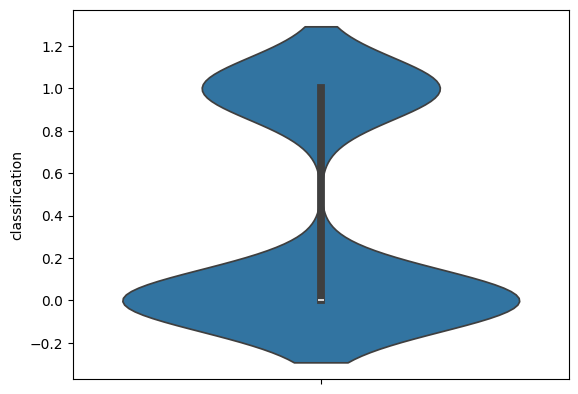

In [ ]:
sns.violinplot(df['classification'])

In [ ]:
x=df.drop(['classification'],axis=1)
y=df['classification']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))

0.975


In [ ]:
lr.intercept_

array([-2.12840653])

In [ ]:
lr.coef_

array([[ 0.12322562,  1.70492466, -1.7308303 , -0.49647127, -0.84987423,
        -0.04001157,  0.08239178, -0.8492204 ,  0.13302327, -1.17559575,
         0.66363913, -0.12613866,  2.55042377,  0.02917868, -0.89154728,
        -0.85516471,  0.20301908, -1.01141742, -0.15203005]])

In [ ]:
df.drop(['wc'],axis=1,inplace=True)

In [ ]:
x=df.drop(['classification'],axis=1)
y=df['classification']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))

0.975


In [ ]:
#no chnage in acuuracy score after dropping wc

In [ ]:
df.drop(['rc'],axis=1,inplace=True)
df.drop(['pc'],axis=1,inplace=True)

In [ ]:
x=df.drop(['classification'],axis=1)
y=df['classification']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))


0.9875


In [ ]:
lr.intercept_
lr.coef_

array([[ 0.12322562,  1.70492466, -1.7308303 , -0.49647127, -0.84987423,
        -0.04001157,  0.08239178, -0.8492204 ,  0.13302327, -1.17559575,
         0.66363913, -0.12613866,  2.55042377,  0.02917868, -0.89154728,
        -0.85516471,  0.20301908, -1.01141742, -0.15203005]])

In [ ]:
#acurracy_score increase after drop rc and pc so it is not imp for prediction

In [ ]:
df.drop(['bp'],axis=1,inplace=True)
df.drop(['ane'],axis=1,inplace=True)

In [ ]:
x=df.drop(['classification'],axis=1)
y=df['classification']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred))

1.0


In [ ]:
#now accuracy score is 1 because all feature which not imporatnt for prediction of kidney disease is drop

<Axes: ylabel='classification'>

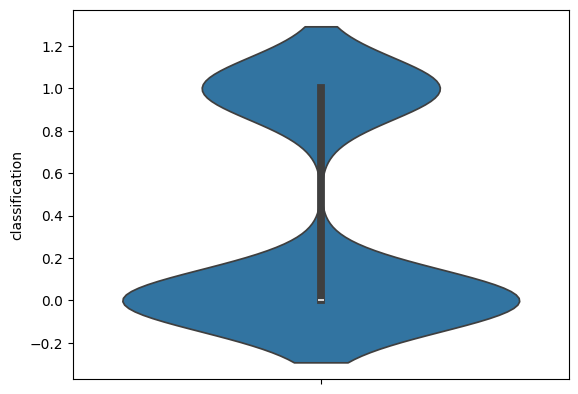

In [ ]:
sns.violinplot(df['classification'])

In [ ]:
#violine plot which represent the distribution of data doesnt change after droping some feature